# Parcial 3 (Práctico)

Marvin Daniel Cely Báez

In [121]:
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

Describa un algoritmo que determine en tiempo O(n**2 lg n) si existen tres puntos colineales de un
conjunto de n puntos dados.

In [122]:
def pendiente(p,q):
    dy = p[1]-q[1]
    dx = p[0]-q[0]
    if dx == 0:
        return 0
    else:
        return ((dy)*1.0)/((dx)*1.0)

def son_Colineales(p1,p2,p3):
    recta1 = pendiente(p1,p2)
    recta2 = pendiente(p2,p3)
    recta3 = pendiente(p1,p3)
    if recta1 == recta2 and recta2 == recta3 and recta1 == recta3:
        return True
    else:
        return False

In [123]:
#Tomado de: http://edupython.blogspot.com.co/2016/06/combinaciones-permutaciones-y-otras.html
def potencia(c):
    """
       Calcula y devuelve el conjunto potencia del 
       conjunto c.
    """
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]

def combinaciones(c, n):
    Elemento = []
    for s in potencia(c):
        if len(s) == n:
            if son_Colineales(s[n-1],s[n-2],s[n-3]):
                Elemento.append(s)
    return Elemento

los puntos colineales son
Punto: [(2, 4), (7, 4), (6, 4)]
Punto: [(4, 2), (7, 5), (6, 4)]
Punto: [(5, 0), (4, 2), (2, 6)]


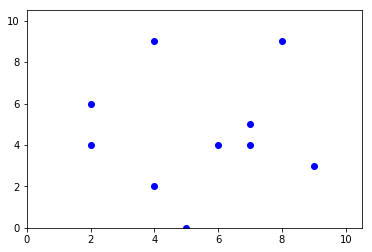

In [127]:
n = 10
x_coord = np.random.randint(n, size=n)
y_coord = np.random.randint(n, size=n)
# Make pairs
points = zip(x_coord,y_coord)

#points: Conjunto de Punto
#3: Conbinacion de esos conjuntos de puntos, en este caso son 3
colineal = combinaciones(points,3)

if len(colineal) > 0:    
    # Plot points and convex hull
    print "los puntos colineales son"
    for i in colineal:
        print "Punto:",i
    plt.plot(x_coord, y_coord,'bo')
    plt.axis([-0.0, n+0.5, -0.0, n+0.5])
    plt.show()
else:
    print "No hay Puntos Colineales"

Dise˜ne un algoritmo que en tiempo O(n lg n) pueda determinar si un poligono definido por una
secuencia de n puntos es simple (sus segmentos no se intersectan entre si).

In [245]:
#Eplicación por: http://pier.guillen.com.mx/algorithms/07-geometricos/07.4-interseccion_segmentos.htm
""" (p1,p2): Puntos de la Recta
    (p3,p4): Puntos Arbitrarios"""
def mismoLado(p1,p2,p3,p4):
    dx = p2[0] - p1[0]
    dx1 = p3[0] - p1[0]
    dx2 = p4[0] - p2[0]
    dy = p2[1] - p1[1]
    dy1 = p3[1] - p1[1]
    dy2 = p4[1] - p2[1]
    return (dx*dy1 - dy*dx1)*(dx*dy2 - dy*dx2)

def entre(x1,x2,x3):
    return ((x1-x3)*(x2-x3) <= 0)

def dentro(p1,p2,p3,p4):
    return entre(p1[0],p2[0],p3[0]) and entre(p1[1],p2[1],p3[1]) or entre(p1[0],p2[0],p4[0]) and entre(p1[1],p2[1],p4[1])

def intersecta(p1,p2,p3,p4):
    int1 = mismoLado(p1,p2,p3,p4)
    int2 = mismoLado(p3,p4,p1,p2)
    return ((int1<0) and (int2<0)) or (int1==0) and (int2==0) and dentro(p1,p2,p3,p4)

In [246]:
#Prueba de que intersecta funciona
p1 = [1,1]
p2 = [10,10]
p3 = [1,2]
p4 = [10,2]
intersecta(p1,p2,p3,p4)

True

In [247]:
def potencia2(c):
    """Calcula y devuelve el conjunto potencia del 
       conjunto c.
    """
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]

def combinaciones2(c, n):
    Elemento = []
    for s in potencia2(c):
        if len(s) == n:
                Elemento.append(s)
    return Elemento

In [254]:
def es_Simple(polygon):
    #Generar segmentos
    segmentos = []
    tam = len(polygon)-1
    for i in range(tam):
        segmentos.append([polygon[i],polygon[i+1]])
    segmentos.append([polygon[tam],polygon[0]])
    c = combinaciones2(segmentos, 2)
    for i in c:
        p1 = i[0][0]
        p2 = i[0][1]
        p3 = i[1][0]
        p4 = i[1][1]
        if p2 != p3 and p1 != p4:
            if intersecta(p1,p2,p3,p4):
                return False
    return True


El poligono 1  no es Simple
El poligono 2  es Simple
El poligono 3  es Simple


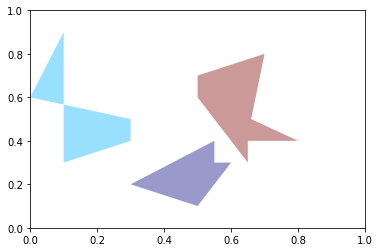

In [259]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon1 = [[0.1,0.9],[0.1,0.3],[0.3,0.4],[0.3,0.5],[0.0,0.6]]
polygon2 = [[0.5,0.1],[0.6,0.3],[0.55,0.3],[0.55,0.4],[0.3,0.2]]
polygon3 = [[0.5,0.6],[0.5,0.7],[0.7,0.8],[0.66,0.5],[0.8,0.4],[0.65,0.4],[0.65,0.3]]

fig, ax = plt.subplots()
patches = []

polygon = Polygon(polygon1, True)
patches.append(polygon)
polygon = Polygon(polygon2, True)
patches.append(polygon)
polygon = Polygon(polygon3, True)
patches.append(polygon)

otherPatches = []
otherPatches.append(polygon1)
otherPatches.append(polygon2)
otherPatches.append(polygon3)

i = 0
for pol in otherPatches:
    i=i+1
    if es_Simple(pol):
        print "El poligono" ,i, " es Simple" 
    else:
        print "El poligono" ,i, " no es Simple"
        
p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))

ax.add_collection(p)

plt.show()

Fin.